In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Directory paths
base_dir = 'C:\\Users\\Adven\\Documents\\Jupyter_Notebook_Spring2024\\Project_1\\Final_Malaria_Data\\'
classes = os.listdir(base_dir)

# Load and partition dataset
def load_data():
    images = []
    labels = []
    for label, class_name in enumerate(classes):
        class_dir = os.path.join(base_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(label)
    return train_test_split(np.array(images), np.array(labels), test_size=0.4, random_state=42)

train_images, test_images, train_labels, test_labels = load_data()
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

# Normalize the images
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# Build the CNN model with best hyperparameters
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(4.8450764961487585e-05)),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.0011083922643732001)),
    MaxPooling2D(2, 2),
    Conv2D(224, (3, 3), activation='relu', kernel_regularizer=l2(0.00027087444014448477)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(3.8230970085041097e-05)),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l2(0.0021025670482126687)),
    Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")






Epoch 1/10


18/18 [==============================] - 12s 622ms/step - loss: 2.2600 - accuracy: 0.4180 - val_loss: 1.9489 - val_accuracy: 0.4868
Epoch 2/10
18/18 [==============================] - 10s 575ms/step - loss: 1.6304 - accuracy: 0.5802 - val_loss: 1.5658 - val_accuracy: 0.5714
Epoch 3/10
18/18 [==============================] - 10s 572ms/step - loss: 1.4185 - accuracy: 0.6261 - val_loss: 1.5244 - val_accuracy: 0.5979
Epoch 4/10
18/18 [==============================] - 10s 575ms/step - loss: 1.2577 - accuracy: 0.6755 - val_loss: 1.2572 - val_accuracy: 0.7090
Epoch 5/10
18/18 [==============================] - 10s 576ms/step - loss: 1.0840 - accuracy: 0.7302 - val_loss: 1.1976 - val_accuracy: 0.6878
Epoch 6/10
18/18 [==============================] - 10s 570ms/step - loss: 1.0327 - accuracy: 0.7478 - val_loss: 1.1285 - val_accuracy: 0.7778
Epoch 7/10
18/18 [==============================] - 10s 556ms/step - loss: 1.0725 - accuracy: 0.7319 - val_loss: 1.0775 - val_accuracy: 

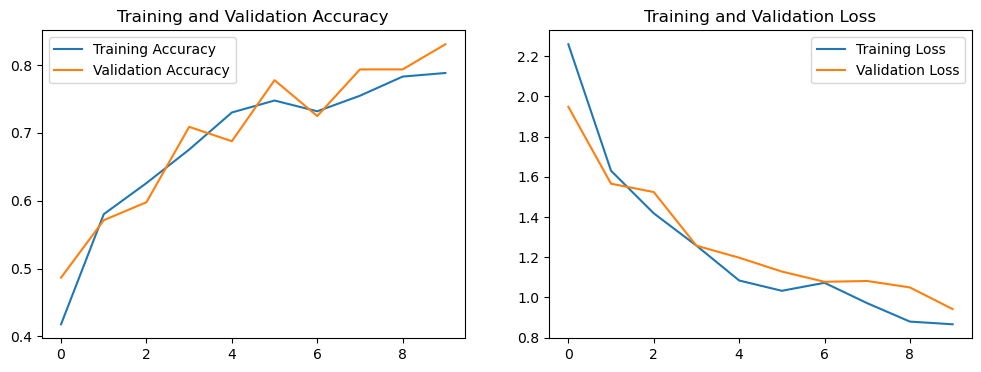

6/6 [==============================] - 1s 128ms/step - loss: 0.9287 - accuracy: 0.7778
Test Accuracy: 77.78%


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Directory paths
base_dir = 'C:\\Users\\Adven\\Documents\\Jupyter_Notebook_Spring2024\\Project_1\\Final_Malaria_Data\\'
classes = os.listdir(base_dir)

# Load and partition dataset
def load_data():
    images = []
    labels = []
    for label, class_name in enumerate(classes):
        class_dir = os.path.join(base_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(label)
    return train_test_split(np.array(images), np.array(labels), test_size=0.4, random_state=42)

train_images, test_images, train_labels, test_labels = load_data()
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

# Normalize the images
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# Build the CNN model with best hyperparameters and an additional Dense layer
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(4.8450764961487585e-05)),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.0011083922643732001)),
    MaxPooling2D(2, 2),
    Conv2D(224, (3, 3), activation='relu', kernel_regularizer=l2(0.00027087444014448477)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(3.8230970085041097e-05)),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l2(0.0021025670482126687)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Additional Dense layer
    Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10
18/18 [==============================] - 12s 590ms/step - loss: 2.2476 - accuracy: 0.4127 - val_loss: 1.7933 - val_accuracy: 0.5291
Epoch 2/10
18/18 [==============================] - 10s 560ms/step - loss: 1.7011 - accuracy: 0.5520 - val_loss: 1.4405 - val_accuracy: 0.6667
Epoch 3/10
18/18 [==============================] - 10s 557ms/step - loss: 1.4005 - accuracy: 0.6543 - val_loss: 1.3490 - val_accuracy: 0.6508
Epoch 4/10
18/18 [==============================] - 10s 564ms/step - loss: 1.2328 - accuracy: 0.6914 - val_loss: 1.1485 - val_accuracy: 0.7778
Epoch 5/10
18/18 [==============================] - 11s 625ms/step - loss: 1.1660 - accuracy: 0.6966 - val_loss: 1.1199 - val_accuracy: 0.7566
Epoch 6/10
18/18 [==============================] - 11s 620ms/step - loss: 1.0353 - accuracy: 0.7513 - val_loss: 1.1607 - val_accuracy: 0.7354
Epoch 7/10
18/18 [==============================] - 10s 579ms/step - loss: 1.1949 - accuracy: 0.7372 - val_loss: 1.1515 - val_accuracy: 0.7513

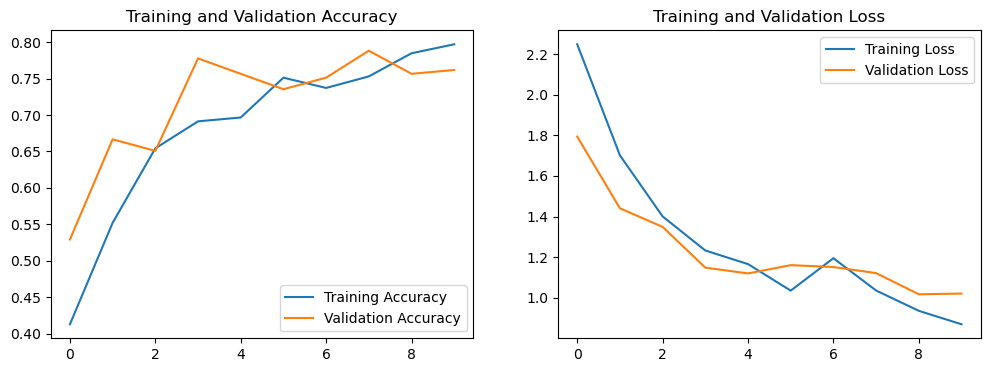

6/6 [==============================] - 1s 123ms/step - loss: 0.9573 - accuracy: 0.7619
Test Accuracy: 76.19%


In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Directory paths
base_dir = 'C:\\Users\\Adven\\Documents\\Jupyter_Notebook_Spring2024\\Project_1\\Final_Malaria_Data\\'
classes = os.listdir(base_dir)

# Load and partition dataset
def load_data():
    images = []
    labels = []
    for label, class_name in enumerate(classes):
        class_dir = os.path.join(base_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(label)
    return train_test_split(np.array(images), np.array(labels), test_size=0.4, random_state=42)

train_images, test_images, train_labels, test_labels = load_data()
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

# Normalize the images
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# Build the CNN model with best hyperparameters and an additional Dense layer
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(4.8450764961487585e-05)),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.0011083922643732001)),
    MaxPooling2D(2, 2),
    Conv2D(224, (3, 3), activation='relu', kernel_regularizer=l2(0.00027087444014448477)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(3.8230970085041097e-05)),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l2(0.0021025670482126687)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Additional Dense layer
    Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Trial 30 Complete [00h 01m 44s]
val_accuracy: 0.7936508059501648

Best val_accuracy So Far: 0.8465608358383179
Total elapsed time: 00h 21m 32s
Epoch 1/10
18/18 [==============================] - 11s 561ms/step - loss: 0.5588 - accuracy: 0.8607 - val_loss: 0.6058 - val_accuracy: 0.8466
Epoch 2/10
18/18 [==============================] - 10s 557ms/step - loss: 0.4623 - accuracy: 0.8977 - val_loss: 0.6960 - val_accuracy: 0.8413
Epoch 3/10
18/18 [==============================] - 10s 553ms/step - loss: 0.4467 - accuracy: 0.8924 - val_loss: 0.6196 - val_accuracy: 0.8307
Epoch 4/10
18/18 [==============================] - 10s 550ms/step - loss: 0.3352 - accuracy: 0.9383 - val_loss: 0.7364 - val_accuracy: 0.8307
Epoch 5/10
18/18 [==============================] - 10s 555ms/step - loss: 0.3034 - accuracy: 0.9436 - val_loss: 0.9412 - val_accuracy: 0.8042
Epoch 6/10
18/18 [==============================] - 10s 556ms/step - loss: 0.3240 - accuracy: 0.9277 - val_loss: 0.6960 - val_accuracy: 0.8519

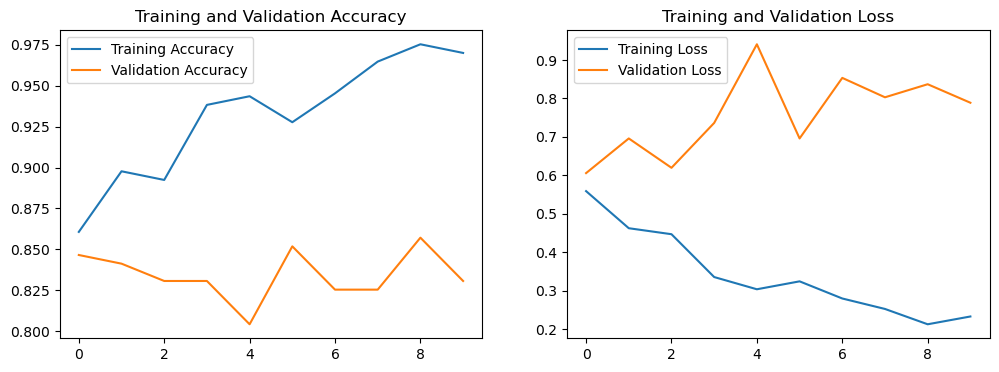

6/6 [==============================] - 1s 124ms/step - loss: 0.7533 - accuracy: 0.8624
Test Accuracy: 86.24%


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from kerastuner.tuners import Hyperband
import matplotlib.pyplot as plt

# Directory paths
base_dir = 'C:\\Users\\Adven\\Documents\\Jupyter_Notebook_Spring2024\\Project_1\\Final_Malaria_Data\\'
classes = os.listdir(base_dir)

# Load and partition dataset
def load_data():
    images = []
    labels = []
    for label, class_name in enumerate(classes):
        class_dir = os.path.join(base_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(label)
    return train_test_split(np.array(images), np.array(labels), test_size=0.4, random_state=42)

train_images, test_images, train_labels, test_labels = load_data()
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# Function to build the model with hyperparameters
def build_model(hp):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(4.8450764961487585e-05)),
        MaxPooling2D(2, 2),
        Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.0011083922643732001)),
        MaxPooling2D(2, 2),
        Conv2D(224, (3, 3), activation='relu', kernel_regularizer=l2(0.00027087444014448477)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=l2(3.8230970085041097e-05)),
        Dropout(hp.Float('dropout_256', min_value=0.0, max_value=0.5, step=0.1)),
        Dense(128, activation='relu', kernel_regularizer=l2(hp.Float('l2_reg_128', min_value=1e-5, max_value=1e-2, sampling='LOG'))),
        Dropout(hp.Float('dropout_128', min_value=0.0, max_value=0.5, step=0.1)),
        Dense(len(classes), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the tuner
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    directory='my_dir',
    project_name='malaria_classification_v7'
)

# Perform hyperparameter search
tuner.search(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the model with the best hyperparameters
history = best_model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the best model on test data
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
